In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

from pandas_profiling import ProfileReport
from random import random 

pd.set_option('display.max_rows',100)

np.random.seed(0)

In [2]:
df = pd.read_csv('Lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
df.shape

(365, 7)

### Module 1: Exploring Data

In [6]:
subsetDataFrame = df[df['Day'].isin(['Monday', 'Tuesday','Wednesday','Thursday','Friday']) ]

In [7]:
subsetDataFrame

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18
5,06/01/2017,Friday,25.3,1.54,23,0.3,11
...,...,...,...,...,...,...,...
358,25/12/2017,Monday,35.5,1.25,19,0.3,15
359,26/12/2017,Tuesday,28.9,1.43,23,0.3,13
360,27/12/2017,Wednesday,42.7,1.00,33,0.3,19
361,28/12/2017,Thursday,37.8,1.25,32,0.3,16


In [8]:
#What was the lowest weekday temperature recorded?
subsetDataFrame['Temperature'].min()

22.0

In [9]:
#On which date was the lowest weekday temperature recorded?
subsetDataFrame[subsetDataFrame['Temperature'] == 22.0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
338,05/12/2017,Tuesday,22.0,1.82,11,0.3,10


In [10]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18


In [11]:
df.dtypes

Date            object
Day             object
Temperature    float64
Rainfall       float64
Flyers           int64
Price          float64
Sales            int64
dtype: object

In [12]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [13]:
df.dtypes

Date           datetime64[ns]
Day                    object
Temperature           float64
Rainfall              float64
Flyers                  int64
Price                 float64
Sales                   int64
dtype: object

In [14]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10
1,2017-01-02,Monday,28.9,1.33,15,0.3,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15
3,2017-01-04,Wednesday,44.1,1.05,28,0.3,17
4,2017-01-05,Thursday,42.4,1.00,33,0.3,18


In [15]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [16]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10,1
1,2017-01-02,Monday,28.9,1.33,15,0.3,13,1
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15,1
3,2017-01-04,Wednesday,44.1,1.05,28,0.3,17,1
4,2017-01-05,Thursday,42.4,1.00,33,0.3,18,1
...,...,...,...,...,...,...,...,...
360,2017-12-27,Wednesday,42.7,1.00,33,0.3,19,12
361,2017-12-28,Thursday,37.8,1.25,32,0.3,16,12
362,2017-12-29,Friday,39.5,1.25,17,0.3,15,12
363,2017-12-30,Saturday,30.9,1.43,22,0.3,13,12


In [17]:
df['Revenue'] = df['Price'] * df['Sales']

In [18]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10,1,3.0
1,2017-01-02,Monday,28.9,1.33,15,0.3,13,1,3.9
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15,1,4.5
3,2017-01-04,Wednesday,44.1,1.05,28,0.3,17,1,5.1
4,2017-01-05,Thursday,42.4,1.00,33,0.3,18,1,5.4
...,...,...,...,...,...,...,...,...,...
360,2017-12-27,Wednesday,42.7,1.00,33,0.3,19,12,5.7
361,2017-12-28,Thursday,37.8,1.25,32,0.3,16,12,4.8
362,2017-12-29,Friday,39.5,1.25,17,0.3,15,12,4.5
363,2017-12-30,Saturday,30.9,1.43,22,0.3,13,12,3.9


In [19]:
#Save to csv
#df.to_csv('lemon.csv', index=False)

In [20]:
#How many flyers did Rosie distribute for the entire year?
df['Flyers'].sum()

14704

In [21]:
#How many flyers did Rosie distribute in January?
jan = df[df['Month'] == 1]

In [22]:
jan

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10,1,3.0
1,2017-01-02,Monday,28.9,1.33,15,0.3,13,1,3.9
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15,1,4.5
3,2017-01-04,Wednesday,44.1,1.05,28,0.3,17,1,5.1
4,2017-01-05,Thursday,42.4,1.00,33,0.3,18,1,5.4
5,2017-01-06,Friday,25.3,1.54,23,0.3,11,1,3.3
6,2017-01-07,Saturday,32.9,1.54,19,0.3,13,1,3.9
7,2017-01-08,Sunday,37.5,1.18,28,0.3,15,1,4.5
8,2017-01-09,Monday,38.1,1.18,20,0.3,17,1,5.1
9,2017-01-10,Tuesday,43.4,1.05,33,0.3,18,1,5.4


In [23]:
jan['Flyers'].sum()

727

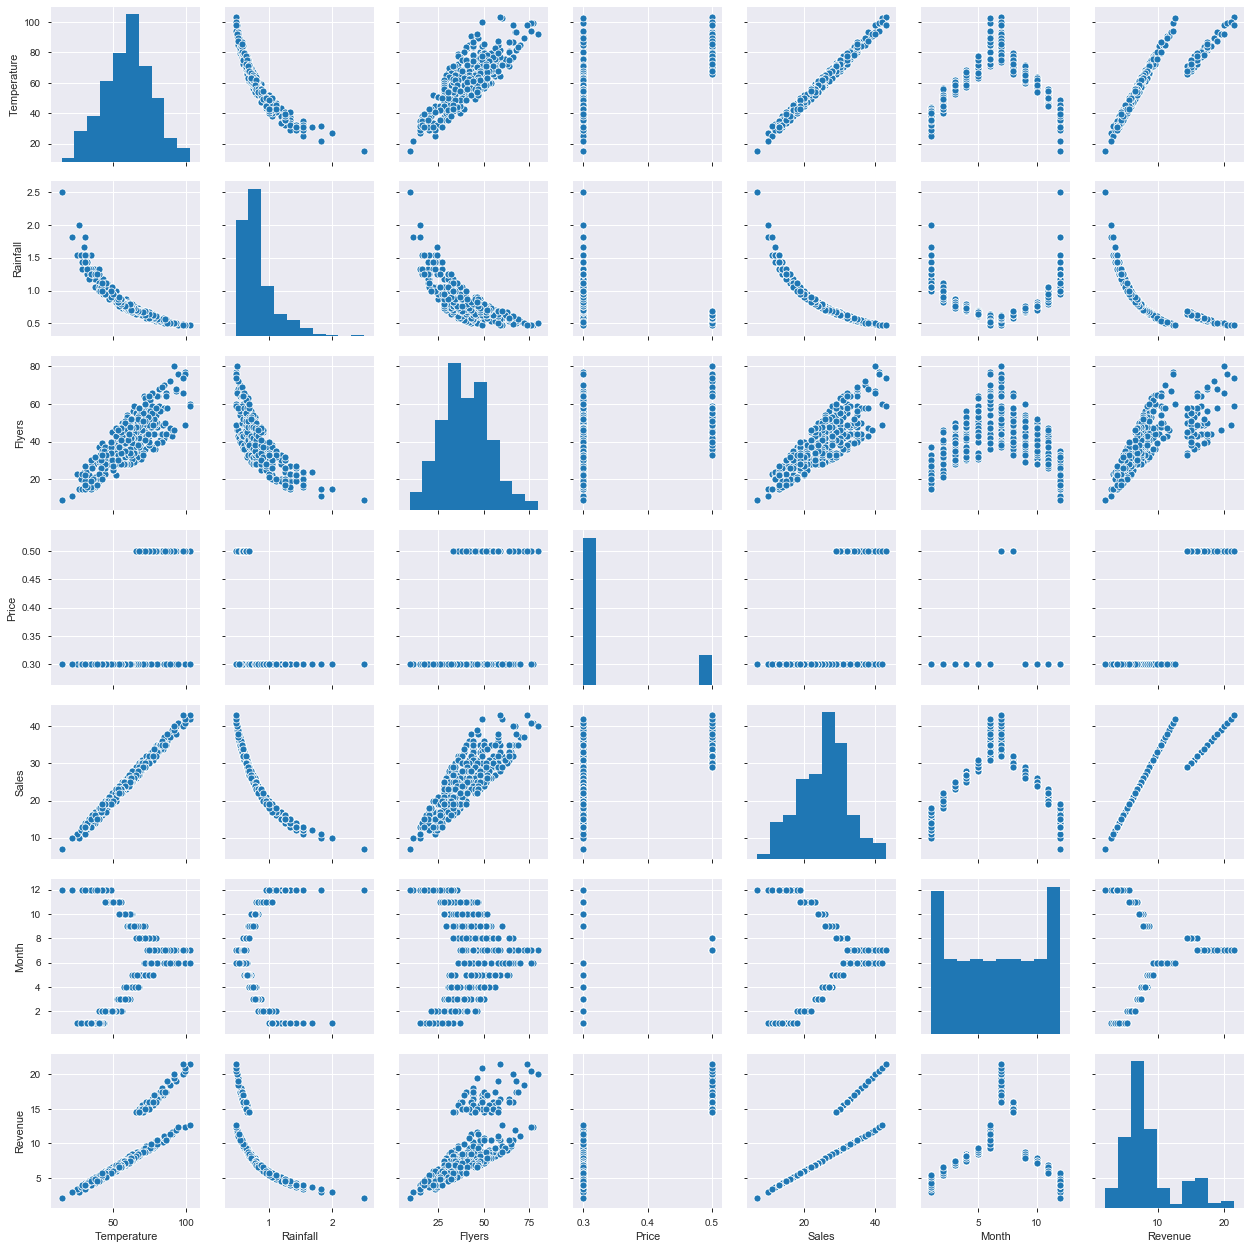

In [24]:
#Based on your examination of the data, which two of the folowing statements are true?
sns.pairplot(data=df)
plt.show()

### Module 2: Data Analysis Fundamentals

In [25]:
#What is the total sum of revenue for August?

august = df[df['Month']==8]

In [26]:
august

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue
212,2017-08-01,Tuesday,75.6,0.63,56,0.5,32,8,16.0
213,2017-08-02,Wednesday,76.3,0.63,48,0.5,31,8,15.5
214,2017-08-03,Thursday,75.0,0.63,52,0.5,30,8,15.0
215,2017-08-04,Friday,70.7,0.69,34,0.5,29,8,14.5
216,2017-08-05,Saturday,76.6,0.61,66,0.5,32,8,16.0
217,2017-08-06,Sunday,77.3,0.61,36,0.5,31,8,15.5
218,2017-08-07,Monday,75.0,0.67,38,0.5,30,8,15.0
219,2017-08-08,Tuesday,68.7,0.65,50,0.5,29,8,14.5
220,2017-08-09,Wednesday,76.6,0.63,55,0.5,32,8,16.0
221,2017-08-10,Thursday,70.3,0.65,56,0.5,31,8,15.5


In [27]:
august['Revenue'].sum()

470.5

In [28]:
#What was the temperature on the hottest Saturday in July?
july = df[df['Month']==7]

In [29]:
july

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue
181,2017-07-01,Saturday,102.9,0.47,59,0.5,43,7,21.5
182,2017-07-02,Sunday,93.4,0.51,68,0.5,38,7,19.0
183,2017-07-03,Monday,81.5,0.54,68,0.5,35,7,17.5
184,2017-07-04,Tuesday,84.2,0.59,49,0.5,34,7,17.0
185,2017-07-05,Wednesday,73.6,0.63,55,0.5,32,7,16.0
186,2017-07-06,Thursday,91.7,0.51,46,0.5,39,7,19.5
187,2017-07-07,Friday,82.5,0.57,41,0.5,35,7,17.5
188,2017-07-08,Saturday,83.2,0.57,44,0.5,34,7,17.0
189,2017-07-09,Sunday,77.9,0.59,44,0.5,33,7,16.5
190,2017-07-10,Monday,98.0,0.49,66,0.5,40,7,20.0


In [30]:
julysat = july[july['Day'] == 'Saturday']

In [31]:
julysat

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue
181,2017-07-01,Saturday,102.9,0.47,59,0.5,43,7,21.5
188,2017-07-08,Saturday,83.2,0.57,44,0.5,34,7,17.0
195,2017-07-15,Saturday,82.5,0.54,56,0.5,35,7,17.5
202,2017-07-22,Saturday,99.6,0.47,49,0.5,42,7,21.0
209,2017-07-29,Saturday,85.5,0.57,50,0.5,35,7,17.5


In [32]:
#What was the lowest number of flyers distributed in a day during November?
nov = df[df['Month']==11]

In [33]:
nov

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue
304,2017-11-01,Wednesday,51.9,0.83,43,0.3,23,11,6.9
305,2017-11-02,Thursday,53.6,0.91,46,0.3,22,11,6.6
306,2017-11-03,Friday,51.3,0.87,38,0.3,21,11,6.3
307,2017-11-04,Saturday,48.7,0.95,39,0.3,19,11,5.7
308,2017-11-05,Sunday,55.9,0.87,45,0.3,23,11,6.9
309,2017-11-06,Monday,51.6,0.91,28,0.3,22,11,6.6
310,2017-11-07,Tuesday,52.3,0.91,34,0.3,21,11,6.3
311,2017-11-08,Wednesday,44.7,0.95,37,0.3,19,11,5.7
312,2017-11-09,Thursday,53.9,0.83,33,0.3,23,11,6.9
313,2017-11-10,Friday,54.6,0.87,28,0.3,22,11,6.6


In [34]:
nov['Flyers'].min()

26

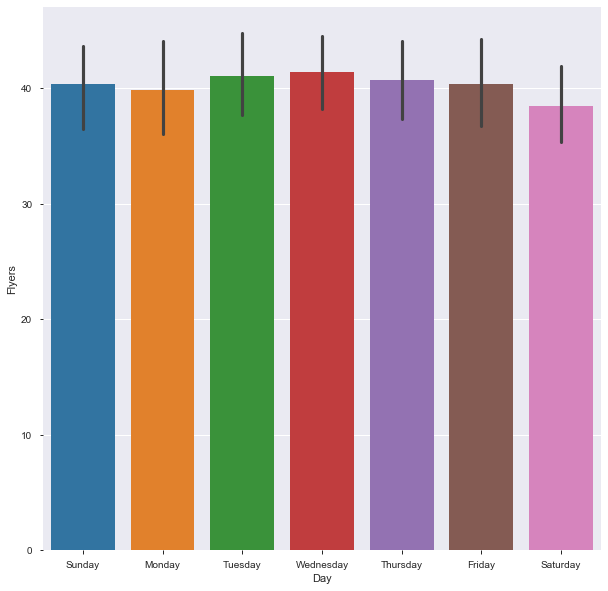

In [35]:
#On which day of the week were most flyers distributed?
#On which day of the week were fewest flyers distributed?
plt.figure(figsize=(10,10))
sns.barplot(x='Day', y='Flyers', data=df)
plt.show()

### Module 3: Getting Started with Statistics

In [36]:
#What values did you calculate for the following measures of central tendency?
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,60.731233,0.826603,40.284932,0.333973,25.323288,6.526027,8.722466
std,16.196266,0.273171,13.178651,0.075206,6.893589,3.452584,4.017536
min,15.100000,0.470000,9.000000,0.300000,7.000000,1.000000,2.100000
25%,49.700000,0.650000,31.000000,0.300000,20.000000,4.000000,6.000000
50%,61.100000,0.740000,39.000000,0.300000,25.000000,7.000000,7.500000
75%,71.300000,0.910000,49.000000,0.300000,30.000000,10.000000,9.300000
max,102.900000,2.500000,80.000000,0.500000,43.000000,12.000000,21.500000


In [37]:
df['Temperature'].mode()

0    55.9
dtype: float64

In [38]:
#What values did you calculate for the following measures of variance?
df['Temperature'].var()

262.3190218274874

In [39]:
df['Temperature'].std()

16.19626567537985

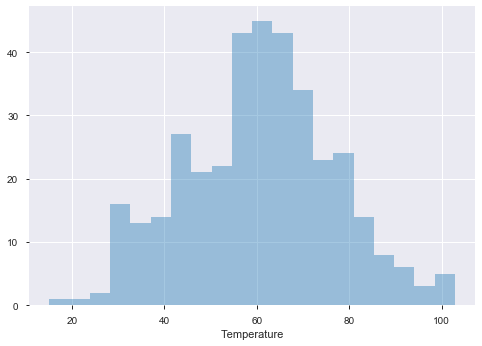

In [40]:
#Which description of the temperature distribution is most accurate?
sns.distplot(a=df['Temperature'],bins=20,kde=False)
plt.show()

In [41]:
df['RandomID'] = np.random.random(size=365)

In [42]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue,RandomID
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10,1,3.0,0.548814
1,2017-01-02,Monday,28.9,1.33,15,0.3,13,1,3.9,0.715189
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15,1,4.5,0.602763
3,2017-01-04,Wednesday,44.1,1.05,28,0.3,17,1,5.1,0.544883
4,2017-01-05,Thursday,42.4,1.00,33,0.3,18,1,5.4,0.423655
...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,Wednesday,42.7,1.00,33,0.3,19,12,5.7,0.187131
361,2017-12-28,Thursday,37.8,1.25,32,0.3,16,12,4.8,0.903984
362,2017-12-29,Friday,39.5,1.25,17,0.3,15,12,4.5,0.543806
363,2017-12-30,Saturday,30.9,1.43,22,0.3,13,12,3.9,0.456911


In [43]:
df2 = df.sort_values(by=['RandomID'])
df2

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue,RandomID
99,2017-04-10,Monday,58.5,0.74,48,0.3,25,4,7.5,0.004695
309,2017-11-06,Monday,51.6,0.91,28,0.3,22,11,6.6,0.011427
166,2017-06-16,Friday,99.3,0.47,77,0.3,41,6,12.3,0.011714
283,2017-10-11,Wednesday,61.5,0.77,47,0.3,25,10,7.5,0.013237
262,2017-09-20,Wednesday,67.1,0.69,52,0.3,27,9,8.1,0.016430
...,...,...,...,...,...,...,...,...,...,...
20,2017-01-21,Saturday,36.2,1.25,16,0.3,14,1,4.2,0.978618
286,2017-10-14,Saturday,59.5,0.74,28,0.3,25,10,7.5,0.981829
52,2017-02-22,Wednesday,47.7,0.95,36,0.3,19,2,5.7,0.988374
210,2017-07-30,Sunday,78.2,0.59,52,0.5,34,7,17.0,0.990339


In [44]:
df['Rainfall'].mean()

0.8266027397260282

In [45]:
df['Rainfall'].std()

0.2731711786583939

In [46]:
df['Rainfall'].mode()

0    0.74
1    0.77
dtype: float64

In [47]:
df['Rainfall'].value_counts()

0.74    26
0.77    26
0.69    22
0.80    20
0.67    19
0.71    19
0.63    19
0.87    18
0.83    17
0.65    17
1.05    15
1.00    14
0.59    12
0.95    11
0.91    10
0.57    10
1.25    10
1.33     9
0.61     8
0.56     7
0.47     7
1.43     7
1.11     7
1.54     7
0.51     6
0.54     6
1.18     5
0.50     3
1.82     2
0.53     2
1.67     1
0.49     1
2.50     1
2.00     1
Name: Rainfall, dtype: int64

In [48]:
samples1 = df2[0:40]

In [49]:
samples1

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue,RandomID
99,2017-04-10,Monday,58.5,0.74,48,0.3,25,4,7.5,0.004695
309,2017-11-06,Monday,51.6,0.91,28,0.3,22,11,6.6,0.011427
166,2017-06-16,Friday,99.3,0.47,77,0.3,41,6,12.3,0.011714
283,2017-10-11,Wednesday,61.5,0.77,47,0.3,25,10,7.5,0.013237
262,2017-09-20,Wednesday,67.1,0.69,52,0.3,27,9,8.1,0.016430
173,2017-06-23,Friday,79.9,0.61,39,0.3,33,6,9.9,0.018522
34,2017-02-04,Saturday,56.6,0.83,46,0.3,22,2,6.6,0.018790
126,2017-05-07,Sunday,69.7,0.65,49,0.3,29,5,8.7,0.019193
97,2017-04-08,Saturday,63.8,0.74,37,0.3,26,4,7.8,0.020108
16,2017-01-17,Tuesday,32.2,1.43,26,0.3,14,1,4.2,0.020218


In [50]:
samples1['Rainfall'].mean()

0.8404999999999999

In [51]:
samples1['Rainfall'].std()

0.3122700179373039

In [52]:
samples2 = df2[35:74]
samples2

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue,RandomID
69,2017-03-11,Saturday,58.2,0.83,30,0.3,24,3,7.2,0.096098
67,2017-03-09,Thursday,52.9,0.80,29,0.3,23,3,6.9,0.097101
296,2017-10-24,Tuesday,61.5,0.74,48,0.3,25,10,7.5,0.097844
146,2017-05-27,Saturday,77.3,0.63,56,0.3,31,5,9.3,0.100227
261,2017-09-19,Tuesday,67.4,0.67,48,0.3,28,9,8.4,0.100294
53,2017-02-23,Thursday,45.0,1.00,23,0.3,20,2,6.0,0.102045
61,2017-03-03,Friday,60.2,0.77,28,0.3,24,3,7.2,0.110375
241,2017-08-30,Wednesday,72.0,0.63,51,0.5,30,8,15.0,0.117532
24,2017-01-25,Wednesday,32.2,1.25,24,0.3,14,1,4.2,0.118274
79,2017-03-21,Tuesday,57.2,0.83,36,0.3,24,3,7.2,0.118728


In [53]:
samples2['Rainfall'].mean()

0.7938461538461539

In [54]:
samples2['Rainfall'].std()

0.1858354589785415

In [55]:
sampling = df2[0:292]
sampling

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue,RandomID
99,2017-04-10,Monday,58.5,0.74,48,0.3,25,4,7.5,0.004695
309,2017-11-06,Monday,51.6,0.91,28,0.3,22,11,6.6,0.011427
166,2017-06-16,Friday,99.3,0.47,77,0.3,41,6,12.3,0.011714
283,2017-10-11,Wednesday,61.5,0.77,47,0.3,25,10,7.5,0.013237
262,2017-09-20,Wednesday,67.1,0.69,52,0.3,27,9,8.1,0.016430
...,...,...,...,...,...,...,...,...,...,...
31,2017-02-01,Wednesday,42.4,1.00,35,0.3,18,2,5.4,0.774234
335,2017-12-02,Saturday,44.1,1.11,35,0.3,17,12,5.1,0.777408
18,2017-01-19,Thursday,43.1,1.18,30,0.3,17,1,5.1,0.778157
334,2017-12-01,Friday,48.7,1.00,34,0.3,19,12,5.7,0.778695


In [56]:
sampling['Rainfall'].mean()

0.82541095890411

In [57]:
sampling['Rainfall'].std()

0.26516577635821464

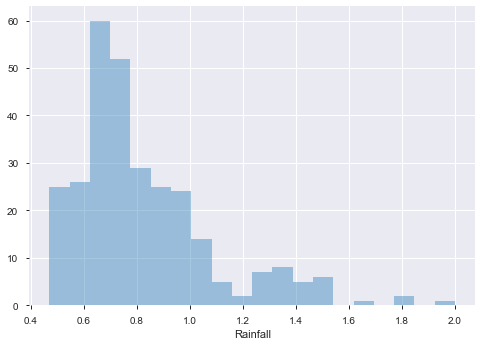

In [58]:
sns.distplot(a=sampling['Rainfall'],bins=20,kde=False)
plt.show()

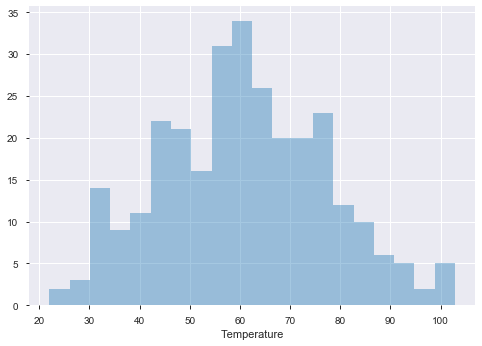

In [59]:
#Create a sampling distribution based on 290 samples of mean Temperature. Each sample should
#be based on 40 random observations.
sns.distplot(a=sampling['Temperature'],bins=20,kde=False)
plt.show()

In [60]:
df.corr()

,Temperature,Rainfall,Flyers,Price,Sales,Month,Revenue,RandomID
Temperature,1.000000,-0.902859,0.797719,0.504709,0.989832,0.032140,0.839314,-0.027007
Rainfall,-0.902859,1.000000,-0.747389,-0.383775,-0.909214,-0.005149,-0.712513,0.026915
Flyers,0.797719,-0.747389,1.000000,0.405437,0.805183,0.041498,0.678700,-0.028822
Price,0.504709,-0.383775,0.405437,1.000000,0.512908,0.127783,0.884179,-0.025020
Sales,0.989832,-0.909214,0.805183,0.512908,1.000000,0.035774,0.849568,-0.025299
Month,0.032140,-0.005149,0.041498,0.127783,0.035774,1.000000,0.094254,-0.044833
Revenue,0.839314,-0.712513,0.678700,0.884179,0.849568,0.094254,1.000000,-0.029703
RandomID,-0.027007,0.026915,-0.028822,-0.025020,-0.025299,-0.044833,-0.029703,1.000000


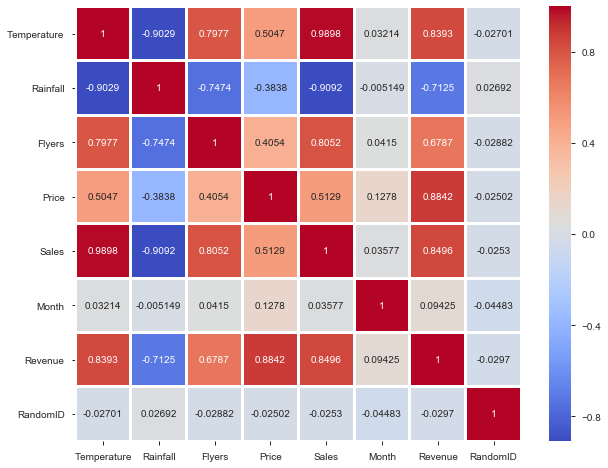

In [61]:
#In the lab, you calculated the correlation between Rainfall and Sales.
#What value did you calculate for this correlation?
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.4g',linewidths=2)
plt.show()